In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [118]:
import pandas as pd
pumpkins = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/çalışma/linearRegression/PumpkinMarket/US-pumpkins.csv')
pumpkins

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.00,100.00,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,14.75,14.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/26/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/27/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/28/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.


In [119]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [120]:
columns_to_select = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

**Determine average price of pumpkin and convert the Date column to only show the month.**

In [121]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

**Converted data into a fresh Pandas dataframe**

In [122]:
new_pumpkins = pd.DataFrame(
    {'Month': month,
     'DayOfYear' : day_of_year,
     'Variety': pumpkins['Variety'],
     'City': pumpkins['City Name'],
     'Package': pumpkins['Package'],
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'],
     'Price': price})

In [123]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [124]:
pumpkins

,Package,Variety,City Name,Low Price,High Price,Date
70,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,9/24/16
71,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,9/24/16
72,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,10/1/16
73,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,17.00,17.0,10/1/16
74,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,10/8/16
...,...,...,...,...,...,...
1738,1/2 bushel cartons,MINIATURE,ST. LOUIS,15.00,15.0,9/30/16
1739,1/2 bushel cartons,MINIATURE,ST. LOUIS,13.75,15.0,9/30/16
1740,1/2 bushel cartons,MINIATURE,ST. LOUIS,10.75,15.0,9/30/16
1741,1/2 bushel cartons,MINIATURE,ST. LOUIS,12.00,12.0,9/30/16


In [125]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

In [126]:
new_pumpkins

,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
0,4,118,NaN,BALTIMORE,24 inch bins,270.00,280.00,275.00
1,5,125,NaN,BALTIMORE,24 inch bins,270.00,280.00,275.00
2,9,267,HOWDEN TYPE,BALTIMORE,24 inch bins,160.00,160.00,160.00
3,9,267,HOWDEN TYPE,BALTIMORE,24 inch bins,160.00,160.00,160.00
4,11,309,HOWDEN TYPE,BALTIMORE,24 inch bins,90.00,100.00,95.00
...,...,...,...,...,...,...,...,...
1752,9,273,MINIATURE,ST. LOUIS,22 lb cartons,14.75,14.75,14.75
1753,9,269,MINIATURE,ST. LOUIS,36 inch bins,275.00,275.00,275.00
1754,9,270,MINIATURE,ST. LOUIS,36 inch bins,275.00,275.00,275.00
1755,9,271,MINIATURE,ST. LOUIS,36 inch bins,275.00,275.00,275.00


Text(0, 0.5, 'Pumpkin Price')

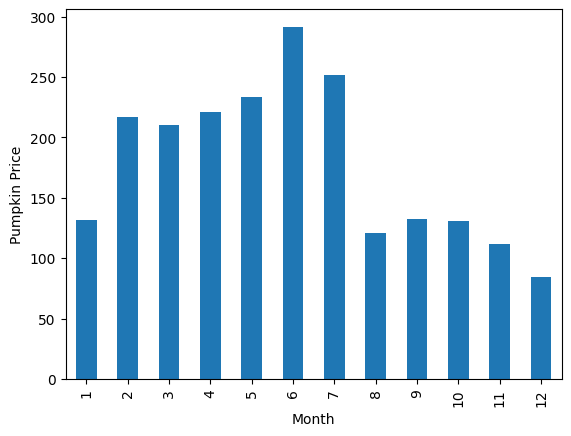

In [129]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

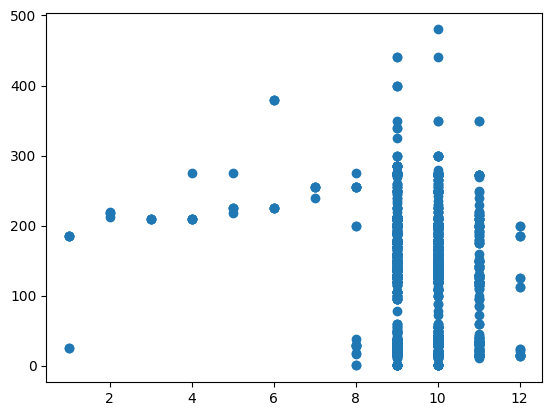

In [130]:
plt.scatter('Month','Price',data=new_pumpkins)

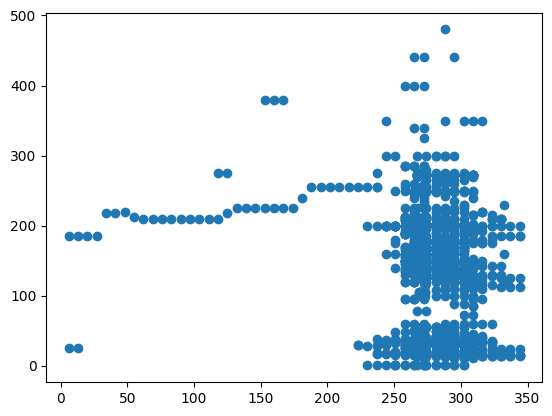

In [134]:
plt.scatter('DayOfYear', 'Price',data=new_pumpkins)

In [135]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14089273695352597
-0.14390795172664367


IndexError: ignored

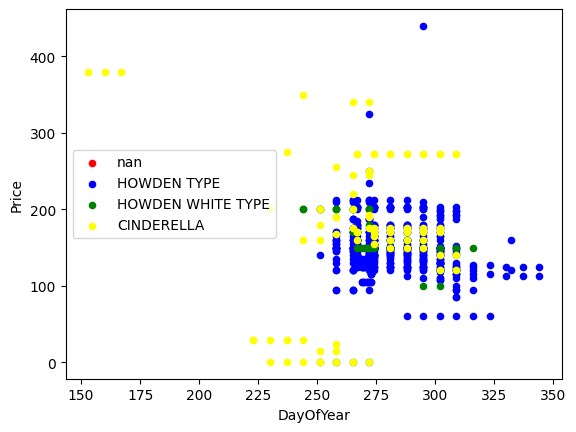

In [137]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

<Axes: xlabel='Variety'>

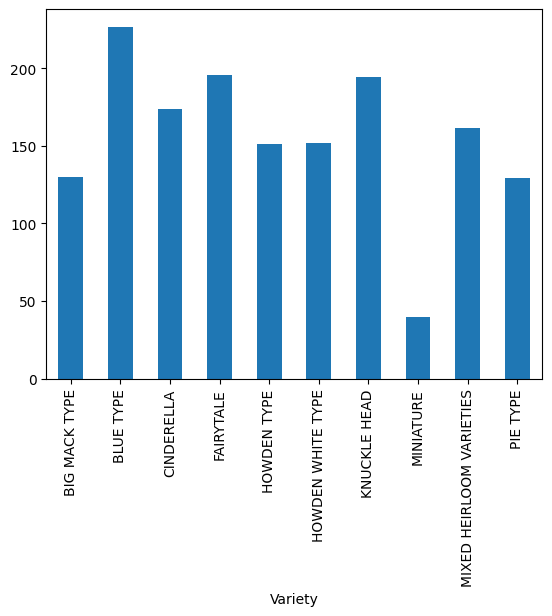

In [138]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

<Axes: xlabel='DayOfYear', ylabel='Price'>

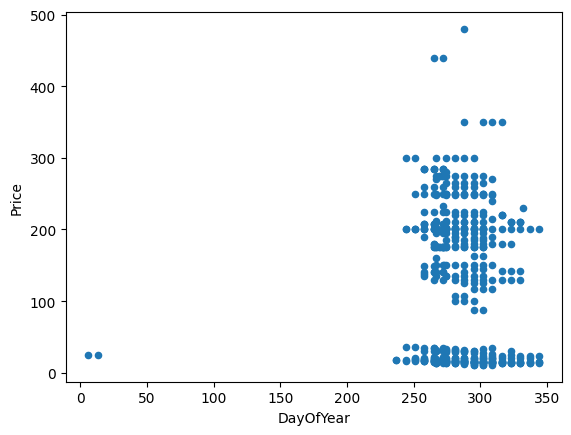

In [139]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear','Price')

In [140]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 70 to 1708
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       468 non-null    int64  
 1   DayOfYear   468 non-null    int64  
 2   Variety     468 non-null    object 
 3   City        468 non-null    object 
 4   Package     468 non-null    object 
 5   Low Price   468 non-null    float64
 6   High Price  468 non-null    float64
 7   Price       468 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ KB


<ipython-input-140-9dcb7d92f638>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


### Simple Linear Regression

---



In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [142]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [145]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [148]:
pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 1.02e+02 (78.8%)


In [149]:
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.0034965306047586298


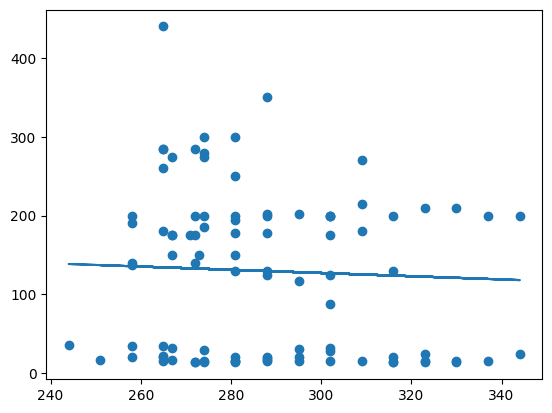

In [150]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

### Polynomial Regression


---



In [151]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [152]:
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [153]:
pred2 = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred2))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred2)*100:3.3}%)')

Mean error: 1.02e+02 (78.3%)


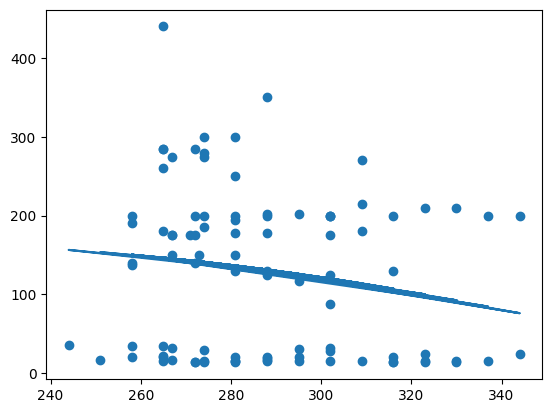

In [154]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred2)

In [155]:
pd.get_dummies(new_pumpkins['Variety'])

,BIG MACK TYPE,BLUE TYPE,CINDERELLA,FAIRYTALE,HOWDEN TYPE,HOWDEN WHITE TYPE,KNUCKLE HEAD,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1752,0,0,0,0,0,0,0,1,0,0
1753,0,0,0,0,0,0,0,1,0,0
1754,0,0,0,0,0,0,0,1,0,0
1755,0,0,0,0,0,0,0,1,0,0


In [156]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [157]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

In [158]:
# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# setup and train the pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

# predict results for test data
pred = pipeline.predict(X_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 4.5e+09 (1.33e+03%)
Model determination:  0.9262820406773427
